<a href="https://colab.research.google.com/github/aayushbhurtel/Data_Visualization/blob/main/Quiz8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

## Aayush Bhurtel

Data Scraping

First of all, I am going to import and load libraries required to load and parse a webpage for this project.

requests is going to get all the raw data from the webpage.
pandas will help to structure and filter the data. whereas BeautifulSoup will parse the code.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Next, I am going to look at the Breaking Bad television series from wikipidia.

https://en.wikipedia.org/wiki/Breaking_Bad

I am using a request library's get method to get the raw data from the passed URL.

In [12]:
rawData = requests.get('https://en.wikipedia.org/wiki/Breaking_Bad')
html_texts = rawData.text
# now lets parse those codes
soup = BeautifulSoup(html_texts,'lxml')

# 1. Display the title for the page


In [13]:
soup.title

<title>Breaking Bad - Wikipedia</title>

In [14]:
# title without title tag
soup.title.text

'Breaking Bad - Wikipedia'

# 2. Within an interesting table, retrieve all links and store them in a list
Now here I am printing out all the links from the webpage

In [15]:
soup.table.findAll('a')

[<a class="image" href="/wiki/File:Breaking_Bad_title_card.png" title='A green montage with the name "Breaking Bad" written on it—the "Br" in "Breaking" and the "Ba" in "Bad" are denoted by the chemical symbols for bromine and barium'><img alt='A green montage with the name "Breaking Bad" written on it—the "Br" in "Breaking" and the "Ba" in "Bad" are denoted by the chemical symbols for bromine and barium' data-file-height="226" data-file-width="399" decoding="async" height="142" src="//upload.wikimedia.org/wikipedia/en/thumb/6/61/Breaking_Bad_title_card.png/250px-Breaking_Bad_title_card.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/6/61/Breaking_Bad_title_card.png/375px-Breaking_Bad_title_card.png 1.5x, //upload.wikimedia.org/wikipedia/en/6/61/Breaking_Bad_title_card.png 2x" width="250"/></a>,
 <a class="mw-redirect" href="/wiki/Crime_drama" title="Crime drama">Crime drama</a>,
 <a class="mw-redirect" href="/wiki/Serial_drama" title="Serial drama">Serial drama</a>,
 <a href="/

Tabulate library in python is used to print small tables without hassle. Readable data in a table for a pretty view of the data.

Then, I used a Beautiful Soup library's finalAll method to print all the data from "infobox vevent" class that I scrapped using a developer tool in my browser. After that, I used Pandas read_html method to grab all the data from class and convert it into string table.

Finally, used a tabulate library to print those data into pretty table.

In [26]:
from tabulate import tabulate
table = soup.find_all(class_ = 'infobox vevent')[0] 
df = pd.read_html(str(table))
print( tabulate(df[0], headers='keys', tablefmt='psql') )

# Table displays differently in jupyter notebook. Github will squeeze all the data so table looks ugly with borders overlapping.

+----+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Breaking Bad         | Breaking Bad.1                                                                                                                                                             |
|----+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | nan                  | nan                                                                                                                                                                        |
|  1 | Genre                | Crime drama Serial drama Thriller[1] Neo-Western[2][3] Black comedy[4] Tragedy[5][6][7]                                                                       

Used same code from above, I tried to print the table from a webpage but using tabulate to see how differently will we get those data in a table.

As we all can see, second column with nan value is useless so, there is still more way to go and learn how to change this scraped data and present it for visual way.

In [36]:
table = soup.find_all(class_ = 'wikitable plainrowheaders')[0]
dataFrame = pd.read_html(str(table))
print( tabulate(dataFrame[0], headers='keys', tablefmt='psql') )

+----+------------------------+--------------------------+----------------------------+------------------------------+---------------------------------------+--------------------------------------+-----------------------------------+
|    |   ('Season', 'Season') | ('Season', 'Season.1')   | ('Episodes', 'Episodes')   | ('Episodes', 'Episodes.1')   | ('Originally aired', 'First aired')   | ('Originally aired', 'Last aired')   | ('Originally aired', 'Network')   |
|----+------------------------+--------------------------+----------------------------+------------------------------+---------------------------------------+--------------------------------------+-----------------------------------|
|  0 |                    nan | 1                        | 7                          | 7                            | January 20, 2008                      | March 9, 2008                        | AMC                               |
|  1 |                    nan | 2                        | 13   

lets look at the actual table with above data in the webpage. I know, I still need to work on my data scraping stuffs.

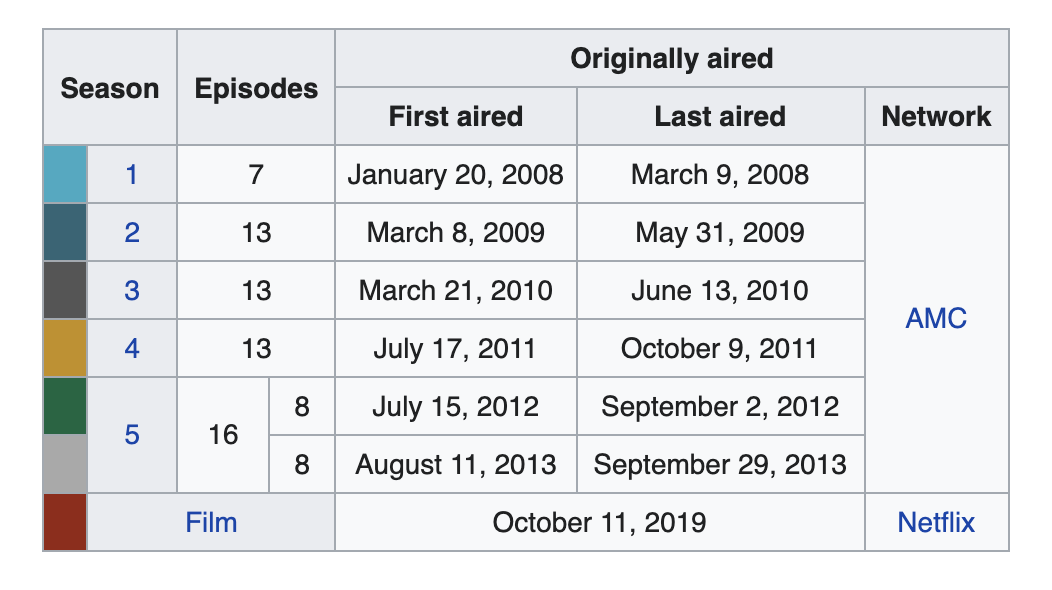